In [99]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pyprogressivex
import random
from random import randint
from time import time
from pylsd.lsd import lsd

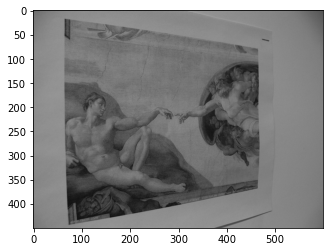

In [100]:
# Load the images
img = cv2.cvtColor(cv2.imread('../graph-cut-ransac/build/data/adam/adam1.png'), cv2.COLOR_BGR2RGB)
plt.imshow(img)

<Figure size 432x288 with 0 Axes>

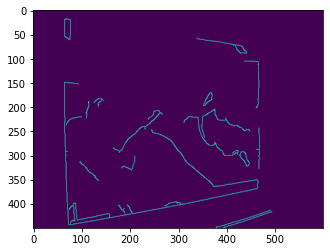

<Figure size 432x288 with 0 Axes>

In [101]:
# Assuming img is your image
# Convert the image to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to the grayscale image
img_blur = cv2.GaussianBlur(img_gray, (7, 7), 0)

# Apply Canny edge detection
edges = cv2.Canny(img_blur, 50, 150)

# Display the image
plt.imshow(edges)
plt.figure()

In [102]:
def random_color(label):
    if label == 0:
        return (255, 0, 0)
    elif label == 1:
        return (0, 255, 0)
    elif label == 2:
        return (0, 0, 255)
    return (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))

def draw_edges_and_line(img, edge_points, line, color):
    # Draw the edge points on the image
    for point in edge_points:
        cv2.circle(img, tuple(point), radius=4, color=color, thickness=-1)

    # Convert the implicit line equation to two endpoints of a line segment
    a, b, c = line
    y1 = 0
    x1 = int(-c/a) if a!=0 else 0
    y2 = img.shape[0] - 1
    x2 = int(-(b*y2 + c)/a) if a!=0 else 0

    # Draw the line on the image
    cv2.line(img, (x1, y1), (x2, y2), color, thickness=2)

In [103]:
def verify_pyprogressivex(img, points, weights, threshold = 2.0):        
    if weights is None:
        weights = []

    lines, labeling = pyprogressivex.findLines(
        np.ascontiguousarray(points), 
        np.ascontiguousarray(weights), 
        img.shape[1], img.shape[0], 
        threshold = threshold,
        conf = 0.99,
        spatial_coherence_weight = 0.0,
        neighborhood_ball_radius = 1.0,
        maximum_tanimoto_similarity = 1.0,
        max_iters = 1000,
        minimum_point_number = 50,
        maximum_model_number = -1,
        sampler_id = 0,
        scoring_exponent = 1.0,
        do_logging = False)    
    return lines, labeling

In [104]:
# Get the indices of edge points
edge_points_original = np.argwhere(edges == 255)
edge_points = edge_points_original[:, ::-1]  # Swap columns

print(f"{len(edge_points)} points found.")

3180 points found.


In [105]:
t = time()

lines, labeling = verify_pyprogressivex(img, edge_points, None, threshold=3.0)

model_number = int(lines.size / 3)

print ('Time = ', time()-t, ' sec')
print ('Models found = {}'.format(model_number))

Time =  0.7088110446929932  sec
Models found = 7


<Figure size 432x288 with 0 Axes>

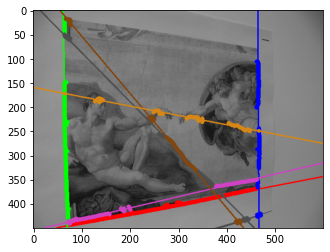

<Figure size 432x288 with 0 Axes>

In [106]:
line_img = img.copy()
max_inlier_number = 0

for idx in range(model_number):    
    mask = np.zeros(len(labeling))
    indices = [i for i, e in enumerate(labeling) if e == idx]
    color = random_color(idx)
    draw_edges_and_line(line_img, edge_points[indices], lines[idx], color)
    
# Display the image
plt.imshow(line_img)
plt.figure()